# <u>Regression Model

## ------------------------------------------------------------------------------------------------------------------------------- 

# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

# Import Data

In [3]:
df = pd.read_csv('PJMW_hourly.csv')
df

,Datetime,PJMW_MW
0,2002-12-31 01:00:00,5077.0
1,2002-12-31 02:00:00,4939.0
2,2002-12-31 03:00:00,4885.0
3,2002-12-31 04:00:00,4857.0
4,2002-12-31 05:00:00,4930.0
...,...,...
143201,2018-01-01 20:00:00,8401.0
143202,2018-01-01 21:00:00,8373.0
143203,2018-01-01 22:00:00,8238.0
143204,2018-01-01 23:00:00,7958.0


In [4]:
df.set_index('Datetime',inplace=True)
df.index=pd.to_datetime(df.index)

In [5]:
daily_data = df.resample(rule='D').mean()
daily_data

,PJMW_MW
Datetime,
2002-04-01,5271.173913
2002-04-02,5310.416667
2002-04-03,5325.916667
2002-04-04,5670.791667
2002-04-05,5686.125000
...,...
2018-07-30,5492.708333
2018-07-31,5660.750000
2018-08-01,5959.708333


In [6]:
daily_data1=daily_data.copy()

In [7]:
daily_data['e1']=daily_data['PJMW_MW'].shift(-1)
daily_data['e2']=daily_data['PJMW_MW'].shift(-2)
daily_data['e3']=daily_data['PJMW_MW'].shift(-3)
daily_data['e4']=daily_data['PJMW_MW'].shift(-4)
daily_data['e5']=daily_data['PJMW_MW'].shift(-5)
daily_data['e6']=daily_data['PJMW_MW'].shift(-6)
daily_data['e7']=daily_data['PJMW_MW'].shift(-7)

daily_data.head(10)

,PJMW_MW,e1,e2,e3,e4,e5,e6,e7
Datetime,,,,,,,,
2002-04-01,5271.173913,5310.416667,5325.916667,5670.791667,5686.125000,5367.791667,5060.652174,5283.875000
2002-04-02,5310.416667,5325.916667,5670.791667,5686.125000,5367.791667,5060.652174,5283.875000,5136.083333
2002-04-03,5325.916667,5670.791667,5686.125000,5367.791667,5060.652174,5283.875000,5136.083333,5171.666667
2002-04-04,5670.791667,5686.125000,5367.791667,5060.652174,5283.875000,5136.083333,5171.666667,5207.875000
2002-04-05,5686.125000,5367.791667,5060.652174,5283.875000,5136.083333,5171.666667,5207.875000,5090.416667
2002-04-06,5367.791667,5060.652174,5283.875000,5136.083333,5171.666667,5207.875000,5090.416667,4586.208333
2002-04-07,5060.652174,5283.875000,5136.083333,5171.666667,5207.875000,5090.416667,4586.208333,4401.333333
2002-04-08,5283.875000,5136.083333,5171.666667,5207.875000,5090.416667,4586.208333,4401.333333,5121.333333
2002-04-09,5136.083333,5171.666667,5207.875000,5090.416667,4586.208333,4401.333333,5121.333333,5496.000000


In [8]:
daily_data=daily_data.dropna()
daily_data

,PJMW_MW,e1,e2,e3,e4,e5,e6,e7
Datetime,,,,,,,,
2002-04-01,5271.173913,5310.416667,5325.916667,5670.791667,5686.125000,5367.791667,5060.652174,5283.875000
2002-04-02,5310.416667,5325.916667,5670.791667,5686.125000,5367.791667,5060.652174,5283.875000,5136.083333
2002-04-03,5325.916667,5670.791667,5686.125000,5367.791667,5060.652174,5283.875000,5136.083333,5171.666667
2002-04-04,5670.791667,5686.125000,5367.791667,5060.652174,5283.875000,5136.083333,5171.666667,5207.875000
2002-04-05,5686.125000,5367.791667,5060.652174,5283.875000,5136.083333,5171.666667,5207.875000,5090.416667
...,...,...,...,...,...,...,...,...
2018-07-23,5900.041667,6142.666667,6036.208333,6216.458333,5978.750000,5485.791667,5293.833333,5492.708333
2018-07-24,6142.666667,6036.208333,6216.458333,5978.750000,5485.791667,5293.833333,5492.708333,5660.750000
2018-07-25,6036.208333,6216.458333,5978.750000,5485.791667,5293.833333,5492.708333,5660.750000,5959.708333


In [9]:
(2,1)

(2, 1)

In [10]:
(5962,)

(5962,)

In [11]:
import numpy as np
x1,x2,x3,x4,x5,x6,x7,y=daily_data['e1'],daily_data['e2'],daily_data['e3'],daily_data['e4'],daily_data['e5'],daily_data['e6'],daily_data['e7'],daily_data['PJMW_MW']
x1,x2,x3,x4,x5,x6,x7,y=np.array(x1),np.array(x2),np.array(x3),np.array(x4),np.array(x5),np.array(x6),np.array(x7),np.array(y)
x1,x2,x3,x4,x5,x6,x7,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),x4.reshape(-1,1),x5.reshape(-1,1),x6.reshape(-1,1),x7.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3,x4,x5,x6,x7),axis=1)
print(final_x)

[[5310.41666667 5325.91666667 5670.79166667 ... 5367.79166667
  5060.65217391 5283.875     ]
 [5325.91666667 5670.79166667 5686.125      ... 5060.65217391
  5283.875      5136.08333333]
 [5670.79166667 5686.125      5367.79166667 ... 5283.875
  5136.08333333 5171.66666667]
 ...
 [6216.45833333 5978.75       5485.79166667 ... 5492.70833333
  5660.75       5959.70833333]
 [5978.75       5485.79166667 5293.83333333 ... 5660.75
  5959.70833333 5805.04166667]
 [5485.79166667 5293.83333333 5492.70833333 ... 5959.70833333
  5805.04166667 5489.        ]]


In [12]:
final_x

array([[5310.41666667, 5325.91666667, 5670.79166667, ..., 5367.79166667,
        5060.65217391, 5283.875     ],
       [5325.91666667, 5670.79166667, 5686.125     , ..., 5060.65217391,
        5283.875     , 5136.08333333],
       [5670.79166667, 5686.125     , 5367.79166667, ..., 5283.875     ,
        5136.08333333, 5171.66666667],
       ...,
       [6216.45833333, 5978.75      , 5485.79166667, ..., 5492.70833333,
        5660.75      , 5959.70833333],
       [5978.75      , 5485.79166667, 5293.83333333, ..., 5660.75      ,
        5959.70833333, 5805.04166667],
       [5485.79166667, 5293.83333333, 5492.70833333, ..., 5959.70833333,
        5805.04166667, 5489.        ]])

In [13]:
y

array([[5271.17391304],
       [5310.41666667],
       [5325.91666667],
       ...,
       [6036.20833333],
       [6216.45833333],
       [5978.75      ]])

In [14]:
X_train,X_test,y_train,y_test=final_x[:-360],final_x[-360:],y[:-360],y[-360:]

In [15]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [16]:
from sklearn.ensemble import RandomForestRegressor
ran_model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)

In [17]:
ran_model.fit(X_train,y_train)
lin_model.fit(X_train,y_train)

C:\Users\cchar\AppData\Local\Temp/ipykernel_14632/275471807.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ran_model.fit(X_train,y_train)


LinearRegression()

# Random Forest Predictions

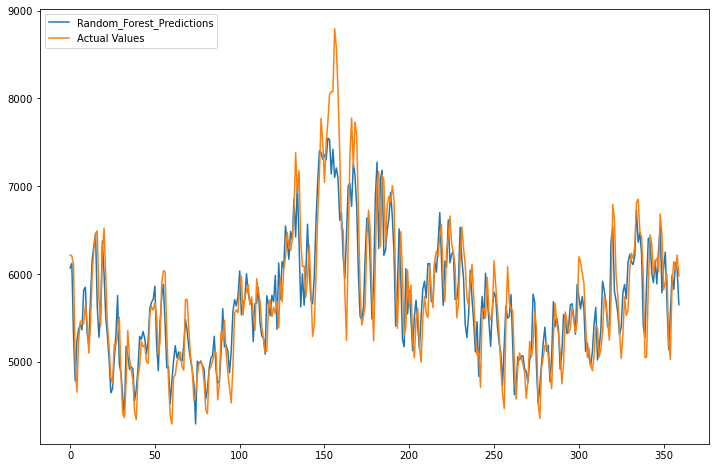

In [18]:
ran_pred=ran_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(ran_pred,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual Values')
plt.legend(loc="upper left")
plt.show()

# Linear regresion Predictions

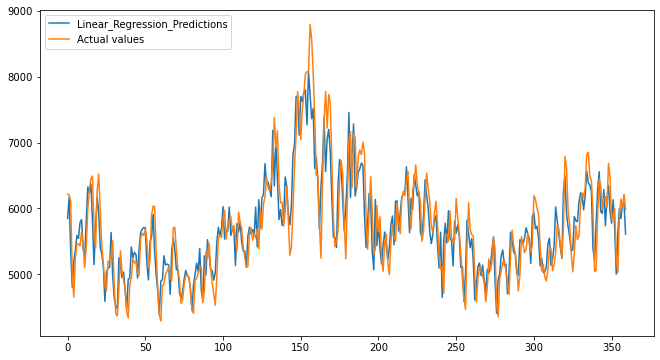

In [19]:
lin_pred=lin_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual values')
plt.legend(loc="upper left")
plt.show()

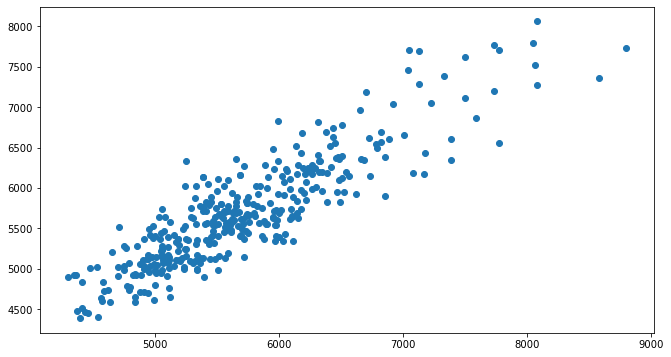

In [20]:
plt.scatter(y_test,lin_pred)

In [21]:
residual = y_test-lin_pred

C:\Users\cchar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

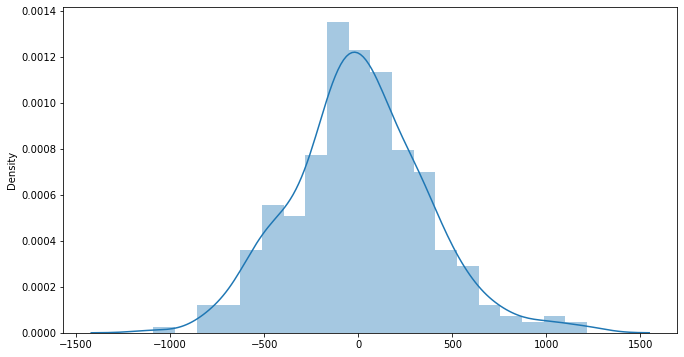

In [22]:
sns.distplot(residual)

In [23]:
lin_pred

array([[5847.57816374],
       [6171.91618996],
       [5345.11432548],
       [4803.57574154],
       [5204.70955991],
       [5366.08578395],
       [5590.30425862],
       [5545.12896693],
       [5789.59881981],
       [5830.15846824],
       [5391.12960924],
       [5269.14375922],
       [5820.74319212],
       [6327.20987302],
       [6242.80073473],
       [6368.56315667],
       [5831.33233183],
       [5146.9237892 ],
       [5717.98161748],
       [6174.96412738],
       [5950.28815017],
       [5405.61441891],
       [5311.01155651],
       [5112.16115929],
       [4588.21061134],
       [5037.38108201],
       [5096.74734933],
       [5106.20700483],
       [5633.4715219 ],
       [4981.10871836],
       [4645.04820934],
       [4513.55107818],
       [4473.42889755],
       [5251.74505932],
       [5126.6508318 ],
       [4950.20797739],
       [5033.45736453],
       [4775.17778494],
       [4460.54179755],
       [4924.17666042],
       [4939.97335413],
       [5416.824

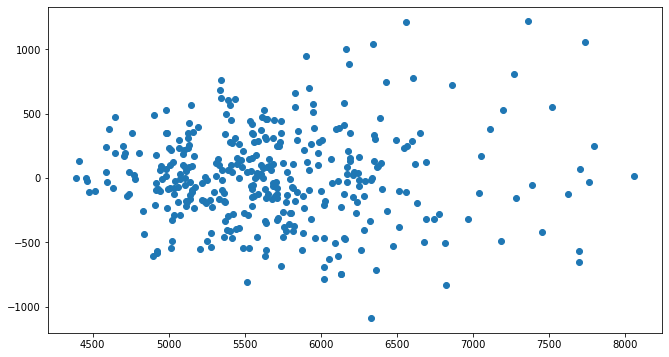

In [24]:
plt.scatter(lin_pred,residual)

# XGBoost

In [25]:
from xgboost import XGBRegressor

In [26]:
xg_model = XGBRegressor()

In [27]:
xg_model.fit(X_train, y_train, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [28]:
predictions = xg_model.predict(X_test)

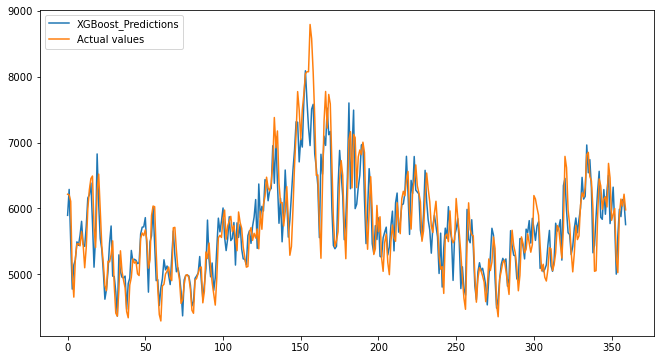

In [29]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(predictions,label='XGBoost_Predictions')
plt.plot(y_test,label='Actual values')
plt.legend(loc="upper left")
plt.show()

# Calculate the RMSE,MAPE and MAE

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error , mean_absolute_percentage_error
from math import sqrt

RMSE_RF=sqrt(mean_squared_error(ran_pred,y_test))
RMSE_LR=sqrt(mean_squared_error(lin_pred,y_test))
MAE_RF = mean_absolute_error(ran_pred,y_test)
MAE_LR = mean_absolute_error(lin_pred,y_test)
MAPE_RF = round((mean_absolute_percentage_error(ran_pred,y_test)*100),3)
MAPE_LR = round((mean_absolute_percentage_error(lin_pred,y_test)*100),3)
MAE_XG = mean_absolute_error(y_test, predictions)
MAPE_XG= round((mean_absolute_percentage_error(y_test,predictions)*100),3)
RMSE_xg=sqrt(mean_squared_error(predictions,y_test))

In [31]:
print('RMSE for Random Forest Model is:',RMSE_RF)
print('MAE for Random Forest Model is:',MAE_RF)
print('MAPE for Random Forest Model is:',MAPE_RF)

RMSE for Random Forest Model is: 369.4738278898292
MAE for Random Forest Model is: 279.2788172524154
MAPE for Random Forest Model is: 4.815


In [32]:
print('RMSE for Linear Regression Model is:',RMSE_LR)
print('MAE for Linear Regression Model is:',MAE_LR)
print('MAPE for Linear Regression Model is:',MAPE_LR)

RMSE for Linear Regression Model is: 357.63972416444017
MAE for Linear Regression Model is: 274.42364321328284
MAPE for Linear Regression Model is: 4.757


In [33]:
print('RMSE for XG Boost Model is:',RMSE_xg)
print('MAE for XG Boos Model is:',MAE_XG)
print('MAPE for XG Boos Model is:',MAPE_XG)

RMSE for XG Boost Model is: 367.99626761010563
MAE for XG Boos Model is: 277.37574101515327
MAPE for XG Boos Model is: 4.775


# 

#  Calculate forecasting accuracy

## 1.LR Model

In [34]:
from sklearn.linear_model import LinearRegression
final_lin_model=LinearRegression()

final_lin_model.fit(final_x,y)

LinearRegression()

In [35]:
# predict for 2018-07-05 to 2018-08-03

In [36]:
forecast_check_data = np.array(daily_data['PJMW_MW'][:'2018-07-04'][-7:])

In [37]:
z=forecast_check_data

for i in range(0,30):
    ck=z[-7:]
    ck=np.array([ck])
    lin_f_chk=final_lin_model.predict(ck)
    z=np.append(z,lin_f_chk)
    i=+1
future_pred_lr=z[-30:]

In [38]:
future_pred_lr

array([6087.09251582, 6215.07826116, 6141.70993716, 6140.72807753,
       6521.71653229, 6673.06839597, 6625.81115278, 6129.98849144,
       6230.5351531 , 6129.1610818 , 6053.21602197, 6329.34702233,
       6398.69905186, 6699.88599776, 6123.79444251, 6285.96296414,
       6114.24171006, 6005.93631469, 6271.30258129, 6065.18873692,
       6763.97047832, 6015.71981222, 6388.09507081, 6088.36325529,
       5943.09456897, 6371.05404089, 5657.65408307, 6915.40554978,
       5746.91866412, 6556.93877208])

In [39]:
future_chk = pd.date_range('2018-07-05','2018-08-03', freq='D')
future_chk_df = pd.DataFrame(index=future_chk)

In [40]:
future_chk_df['future_chk_energy'] = future_pred_lr.tolist()

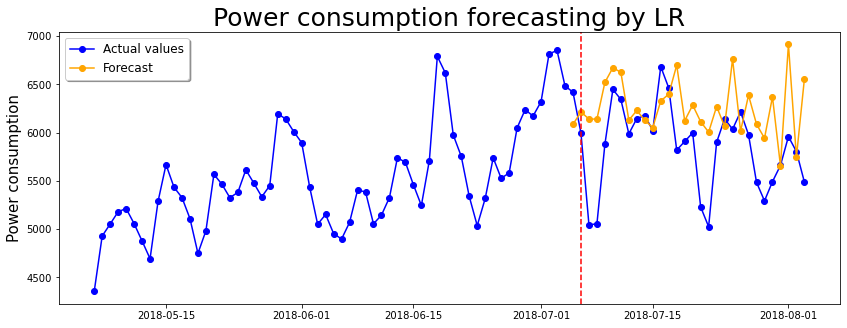

In [41]:
plt.figure(figsize=(14,5))
plt.title("Power consumption forecasting by LR", fontsize=25)

plt.plot(daily_data1[-90:].index,daily_data1[-90:].values, label='Actual values', color="blue", marker="o")

plt.plot(future_chk_df.index,future_chk_df.values, label='Forecast', color="orange", marker="o")
# plt.fill_between(future_df.index, lower_limits_f, upper_limits_f, alpha=0.1, color="orange")

plt.axvline(future_chk_df.index[1], color="red", linestyle="--")
plt.legend(fontsize=12, fancybox=True, shadow=True, frameon=True)
plt.ylabel('Power consumption', fontsize=15)
plt.show()

In [42]:
daily_data_last_30 = daily_data['PJMW_MW'].tail(30)

In [43]:
MAE_check = mean_absolute_error(daily_data_last_30, future_chk_df)
MAPE_check= round((mean_absolute_percentage_error(daily_data_last_30,future_chk_df)*100),3)
RMSE_check=sqrt(mean_squared_error(future_chk_df,daily_data_last_30))

In [44]:
print('RMSE for forecast check is:',RMSE_check)
print('MAE for forecast check is:',MAE_check)
print('MAPE for forecast check is:',MAPE_check)

RMSE for forecast check is: 503.3396832665372
MAE for forecast check is: 387.0100132111449
MAPE for forecast check is: 6.737


# 

### 2.RF Model

In [45]:
from sklearn.ensemble import RandomForestRegressor
final_RF_model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)

In [46]:
final_RF_model.fit(final_x,y)

C:\Users\cchar\AppData\Local\Temp/ipykernel_14632/840889585.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  final_RF_model.fit(final_x,y)


RandomForestRegressor(max_features=3, random_state=1)

In [47]:
z=forecast_check_data

for i in range(0,30):
    ck=z[-7:]
    ck=np.array([ck])
    rf_f_chk=final_RF_model.predict(ck)
    z=np.append(z,rf_f_chk)
    i=+1
future_pred_RF=z[-30:]

In [48]:
future_pred_RF

array([5793.1       , 6137.5425    , 6068.89375   , 6211.30875   ,
       6631.58291667, 6631.38      , 6629.54583333, 5823.7225    ,
       6055.17083333, 6000.25083333, 6040.33875   , 6475.48791667,
       6430.08416667, 6754.70791667, 5743.65541667, 6030.57625   ,
       6062.09625   , 5967.69375   , 6482.53375   , 6041.91416667,
       6868.79291667, 5713.46916667, 5946.79333333, 6050.84041667,
       5902.32666667, 6569.09166667, 5903.91625   , 6942.445     ,
       5616.59916667, 5825.76166667])

In [49]:
future_pred_RF.shape

(30,)

In [50]:
future_chk_rf = pd.date_range('2018-07-05','2018-08-03', freq='D')
future_chk_df_rf = pd.DataFrame(index=future_chk_rf)
future_chk_df_rf['future_chk_energy'] = future_pred_RF.tolist()

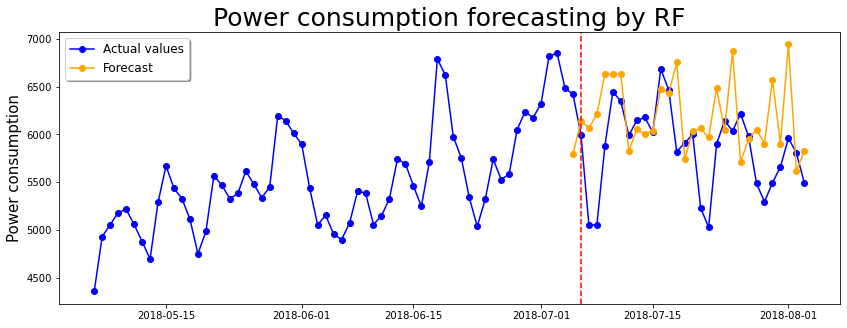

In [51]:
plt.figure(figsize=(14,5))
plt.title("Power consumption forecasting by RF", fontsize=25)

plt.plot(daily_data1[-90:].index,daily_data1[-90:].values, label='Actual values', color="blue", marker="o")

plt.plot(future_chk_df_rf.index,future_chk_df_rf.values, label='Forecast', color="orange", marker="o")
#plt.fill_between(future_df.index, lower_limits_f, upper_limits_f, alpha=0.1, color="orange")

plt.axvline(future_chk_df_rf.index[1], color="red", linestyle="--")
plt.legend(fontsize=12, fancybox=True, shadow=True, frameon=True)
plt.ylabel('Power consumption', fontsize=15)
plt.show()

In [52]:
MAE_rf_check = mean_absolute_error(daily_data_last_30, future_chk_df_rf)
MAPE_rf_check= round((mean_absolute_percentage_error(daily_data_last_30,future_chk_df_rf)*100),3)
RMSE_rf_check=sqrt(mean_squared_error(future_chk_df_rf,daily_data_last_30))
print('RMSE for RF forecast check is:',RMSE_rf_check)
print('MAE for RF forecast check is:',MAE_rf_check)
print('MAPE for RF forecast check is:',MAPE_rf_check)

RMSE for RF forecast check is: 502.1686061700222
MAE for RF forecast check is: 381.85138888888844
MAPE for RF forecast check is: 6.636


# 

## 3.XGB Model

In [53]:
from xgboost import XGBRegressor
final_xg_model = XGBRegressor()
final_xg_model.fit(final_x,y, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [54]:
z=forecast_check_data

for i in range(0,30):
    ck=z[-7:]
    ck=np.array([ck])
    xgb_f_chk=final_xg_model.predict(ck)
    z=np.append(z,xgb_f_chk)
    i=+1
future_pred_XGB=z[-30:]

In [55]:
future_pred_XGB

array([5897.57763672, 6123.58398438, 6021.56787109, 6287.93652344,
       6685.92773438, 6617.20605469, 6768.93115234, 5625.25585938,
       6333.85009766, 5777.31640625, 6296.92822266, 7010.97509766,
       6167.36865234, 7429.27832031, 5417.46728516, 6601.02050781,
       5548.9765625 , 6433.54736328, 6960.90380859, 5397.95068359,
       7700.91601562, 5550.84667969, 6731.82714844, 5506.55712891,
       6060.65380859, 7304.12402344, 5373.82861328, 7802.265625  ,
       5170.30908203, 7098.05517578])

In [56]:
future_chk_xgb = pd.date_range('2018-07-05','2018-08-03', freq='D')
future_chk_df_xgb = pd.DataFrame(index=future_chk_xgb)
future_chk_df_xgb['future_chk_energy'] = future_pred_XGB.tolist()

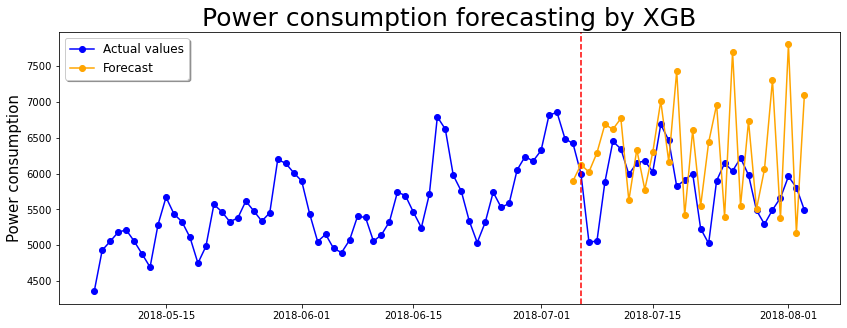

In [57]:
plt.figure(figsize=(14,5))
plt.title("Power consumption forecasting by XGB", fontsize=25)

plt.plot(daily_data1[-90:].index,daily_data1[-90:].values, label='Actual values', color="blue", marker="o")

plt.plot(future_chk_df_xgb.index,future_chk_df_xgb.values, label='Forecast', color="orange", marker="o")
# plt.fill_between(future_df.index, lower_limits_f, upper_limits_f, alpha=0.1, color="orange")

plt.axvline(future_chk_df_xgb.index[1], color="red", linestyle="--")
plt.legend(fontsize=12, fancybox=True, shadow=True, frameon=True)
plt.ylabel('Power consumption', fontsize=15)
plt.show()

In [58]:
MAE_xgb_check = mean_absolute_error(daily_data_last_30, future_chk_df_xgb)
MAPE_xgb_check= round((mean_absolute_percentage_error(daily_data_last_30,future_chk_df_xgb)*100),3)
RMSE_xgb_check=sqrt(mean_squared_error(future_chk_df_xgb,daily_data_last_30))
print('RMSE for XGB forecast check is:',RMSE_xgb_check)
print('MAE for XGB forecast check is:',MAE_xgb_check)
print('MAPE for XGB forecast check is:',MAPE_xgb_check)

RMSE for XGB forecast check is: 841.7610267294683
MAE for XGB forecast check is: 683.2504448784723
MAPE for XGB forecast check is: 11.565


# 

# Forecast

In [59]:
from sklearn.ensemble import RandomForestRegressor
final_RF_model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)

In [60]:
final_RF_model.fit(final_x,y)

C:\Users\cchar\AppData\Local\Temp/ipykernel_14632/840889585.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  final_RF_model.fit(final_x,y)


RandomForestRegressor(max_features=3, random_state=1)

In [61]:
daily_data_last_7 = np.array(daily_data['PJMW_MW'].tail(7))
daily_data_last_7

array([5230.75      , 5025.5       , 5900.04166667, 6142.66666667,
       6036.20833333, 6216.45833333, 5978.75      ])

In [62]:
z=daily_data_last_7

for i in range(0,30):
    r=z[-7:]
    r=np.array([r])
    ranf_f=final_RF_model.predict(r)
    z=np.append(z,ranf_f)
    i=+1
future_pred=z[-30:]

In [63]:
future_pred

array([5873.66458333, 5194.43833333, 5452.51125   , 5866.39916667,
       5898.91125   , 6097.2925    , 6044.88333333, 6160.67583333,
       5364.67166667, 5507.04728261, 5579.14434783, 5750.97      ,
       6012.83333333, 5952.28541667, 6272.86208333, 5492.05166667,
       5476.05583333, 5367.05996377, 5427.38833333, 5796.44333333,
       5691.07458333, 6278.67041667, 5501.02625   , 5747.82333333,
       5442.76875   , 5369.23947464, 5802.16371377, 5344.74166667,
       6399.48916667, 5456.83208333])

In [64]:
future = pd.date_range('2018-08-04','2018-09-02', freq='D')
future_df = pd.DataFrame(index=future)

In [65]:
future_df['future_energy'] = future_pred.tolist()

In [83]:
future_df

,future_energy
2018-08-04,5873.664583
2018-08-05,5194.438333
2018-08-06,5452.511250
2018-08-07,5866.399167
2018-08-08,5898.911250
2018-08-09,6097.292500
2018-08-10,6044.883333
2018-08-11,6160.675833
2018-08-12,5364.671667
2018-08-13,5507.047283


In [66]:
print(future_df)

            future_energy
2018-08-04    5873.664583
2018-08-05    5194.438333
2018-08-06    5452.511250
2018-08-07    5866.399167
2018-08-08    5898.911250
2018-08-09    6097.292500
2018-08-10    6044.883333
2018-08-11    6160.675833
2018-08-12    5364.671667
2018-08-13    5507.047283
2018-08-14    5579.144348
2018-08-15    5750.970000
2018-08-16    6012.833333
2018-08-17    5952.285417
2018-08-18    6272.862083
2018-08-19    5492.051667
2018-08-20    5476.055833
2018-08-21    5367.059964
2018-08-22    5427.388333
2018-08-23    5796.443333
2018-08-24    5691.074583
2018-08-25    6278.670417
2018-08-26    5501.026250
2018-08-27    5747.823333
2018-08-28    5442.768750
2018-08-29    5369.239475
2018-08-30    5802.163714
2018-08-31    5344.741667
2018-09-01    6399.489167
2018-09-02    5456.832083


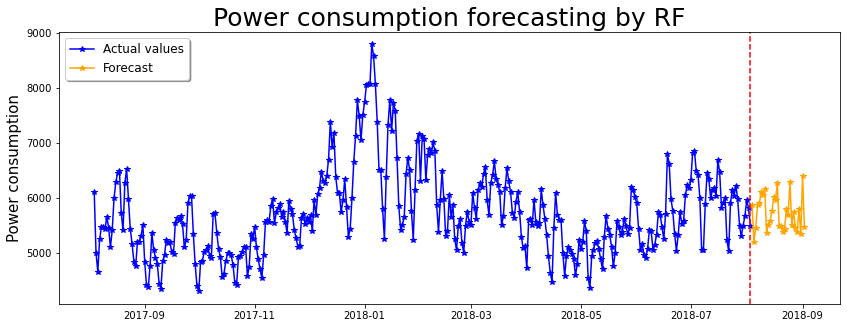

In [67]:
plt.figure(figsize=(14,5))
plt.title("Power consumption forecasting by RF", fontsize=25)

plt.plot(daily_data1[-365:].index,daily_data1[-365:].values, label='Actual values', color="blue", marker="*")

plt.plot(future_df.index,future_df.values, label='Forecast', color="orange", marker="*")
# plt.fill_between(future_df.index, lower_limits_f, upper_limits_f, alpha=0.1, color="orange")

plt.axvline(daily_data1.index[-1], color="red", linestyle="--")
plt.legend(fontsize=12, fancybox=True, shadow=True, frameon=True)
plt.ylabel('Power consumption', fontsize=15)
plt.show()

# 

In [68]:
#Import Pickle
import pickle

In [69]:
from pickle import load
from pickle import dump

In [72]:
future_weekly = pd.date_range('2018-08-04','2018-09-02', freq='W')
future_weekly_df = pd.DataFrame(index=future)

In [79]:
# Exporting to csv file
future_weekly_df.to_csv(r'future_weekly_df.csv',index=True)

In [81]:
# Exporting to csv file
future_df.to_csv(r'future_df.csv',index=True)

In [75]:
# Saving the pickle file
import pickle
pickle.dump(final_RF_model, open('Forecast_random_forest.pkl','wb'))

In [84]:
7days = daily_data.tail(7)
7days

SyntaxError: invalid syntax (Temp/ipykernel_14632/2929346985.py, line 1)

In [85]:
daily_data.tail(7)

,PJMW_MW,e1,e2,e3,e4,e5,e6,e7
Datetime,,,,,,,,
2018-07-21,5230.750000,5025.500000,5900.041667,6142.666667,6036.208333,6216.458333,5978.750000,5485.791667
2018-07-22,5025.500000,5900.041667,6142.666667,6036.208333,6216.458333,5978.750000,5485.791667,5293.833333
2018-07-23,5900.041667,6142.666667,6036.208333,6216.458333,5978.750000,5485.791667,5293.833333,5492.708333
2018-07-24,6142.666667,6036.208333,6216.458333,5978.750000,5485.791667,5293.833333,5492.708333,5660.750000
2018-07-25,6036.208333,6216.458333,5978.750000,5485.791667,5293.833333,5492.708333,5660.750000,5959.708333
2018-07-26,6216.458333,5978.750000,5485.791667,5293.833333,5492.708333,5660.750000,5959.708333,5805.041667
2018-07-27,5978.750000,5485.791667,5293.833333,5492.708333,5660.750000,5959.708333,5805.041667,5489.000000


In [86]:
z

array([5230.75      , 5025.5       , 5900.04166667, 6142.66666667,
       6036.20833333, 6216.45833333, 5978.75      , 5873.66458333,
       5194.43833333, 5452.51125   , 5866.39916667, 5898.91125   ,
       6097.2925    , 6044.88333333, 6160.67583333, 5364.67166667,
       5507.04728261, 5579.14434783, 5750.97      , 6012.83333333,
       5952.28541667, 6272.86208333, 5492.05166667, 5476.05583333,
       5367.05996377, 5427.38833333, 5796.44333333, 5691.07458333,
       6278.67041667, 5501.02625   , 5747.82333333, 5442.76875   ,
       5369.23947464, 5802.16371377, 5344.74166667, 6399.48916667,
       5456.83208333])

In [ ]:
np.savetxt("daily_data_last_7.csv", daily_data_last_7, delimiter=",")